In [144]:
# System
import os
import json

# Config
import warnings

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Data
import numpy as np
import pandas as pd

# View
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from IPython.display import Image

# ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# ML Models
from sklearn.dummy import DummyRegressor

from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [65]:
# Utilities Files
def read_csv(name: str, index_label='id') -> pd.DataFrame:
    return pd.read_csv('../data/' + name + '.csv', index_col=index_label)


def save_csv(df: pd.DataFrame, name: str, index_label='id'):
    df.to_csv('../data/' + name + '.csv', index_label=index_label)

def show_image(name: str):
    return Image(filename= '../images/' + name + '.png')

In [66]:
# Development Flags
SHOW_IN_RELEASE = False
SHOW_IN_DEVELOPMENT = True
MIN_DATA_MODE = False

In [67]:
if SHOW_IN_RELEASE:
    show_image('Sorry')

In [68]:
if SHOW_IN_RELEASE:
    show_image('Data_Collectors')

In [69]:
if SHOW_IN_DEVELOPMENT:
    warnings.filterwarnings('ignore')

In [70]:
# Load the data

df_original = read_csv('businesses')
df_original = df_original[df_original["HasExpensiveLevel"]==1]

if MIN_DATA_MODE:
    df_original = train_test_split(df_original, train_size=0.05, random_state=70)[0]

df = df_original.copy()

# Remove text columns and 'ExpensiveLevel'
df.drop(["Url", "Name", "HasExpensiveLevel", "SubCategories", "AttributesHas"], axis=1, inplace=True)

In [71]:
# Split the data to Train and Final Test

Y = target = df["ExpensiveLevel"]
X = data = df.drop(["ExpensiveLevel"], axis=1)
x_train, x_finale_test, y_train, y_finale_test = train_test_split(X, Y, test_size=0.05, random_state=70)

In [72]:
# create Data Frame of the Train Data

df = df_train = pd.concat([y_train, x_train], axis=1)
df.reset_index(drop=True, inplace=True)

In [73]:
# Visuation for undestanding the data

In [109]:
# Config columns names
target_column = "ExpensiveLevel"
target_column_label = "Expensive Level"

prime_flag_columns = [
    'Claimed', 'HasWebsite'
]

prime_countable_columns = [
    'Stars',
    'SubCategoriesCount', 'AttributesCount',
    'QuestionsCount', 'WeeklyBreaks', 'WeeklyDays'
]
prime_non_countable_columns = [
     'Reviews', 'Photos',
    'WeeklyHours'
]

prime_columns = prime_flag_columns + prime_countable_columns + prime_non_countable_columns

In [75]:
# Describe
df[[target_column] + prime_columns].describe()

# The data has mostly medium(2) expensive level instances

,ExpensiveLevel,Claimed,HasWebsite,Stars,SubCategoriesCount,AttributesCount,QuestionsCount,WeeklyBreaks,WeeklyDays,Reviews,Photos,WeeklyHours
count,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000,17023.000000
mean,2.023204,0.740058,0.862539,8.227516,2.194737,4.211361,3.878870,0.661928,5.175938,426.827234,543.915115,111.636609
std,0.593795,0.438616,0.344344,0.875180,0.821355,0.477525,0.393836,1.841527,1.615852,685.719289,993.970406,53.388797
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,8.000000,1.000000,4.000000,4.000000,0.000000,5.000000,74.000000,91.000000,78.000000
50%,2.000000,1.000000,1.000000,8.000000,2.000000,4.000000,4.000000,0.000000,6.000000,210.000000,246.000000,118.000000
75%,2.000000,1.000000,1.000000,9.000000,3.000000,4.000000,4.000000,0.000000,6.000000,496.000000,595.000000,147.000000
max,4.000000,1.000000,1.000000,10.000000,4.000000,9.000000,4.000000,14.000000,6.000000,16981.000000,31726.000000,336.000000


In [76]:
def disply_atter_per_column(inedexs: list, values: list, columns_label: list, min_value: float, max_value: float):
    global legend_colors, target_column, target_column_label
    
    # Main elements    
    fig = plt.figure(figsize = [16, 8])
        
    for i in range(len(values)):        
        value = values[i]
        if value is not None:
            index = indexs[i]
            label = columns_label[i]
            
            # Graf
            ax_graf =  fig.add_subplot(1, len(values), i+1)
            
            plt.sca(ax_graf)
            plt.plot(index, value)
            plt.xlabel(label)
            plt.ylabel(target_column_label)
            plt.ylim(min_value, max_value)
            
    plt.show()

In [77]:
def disply_multi_bars(inedexs: list, values: list, indexs_label, values_label, elements_in_line: int):
    global legend_colors
    
    values += np.full(elements_in_line-len(values)%elements_in_line, None).tolist()
    inedexs += np.full(elements_in_line-len(values)%elements_in_line, None).tolist()
    
    h = int(len(values) / elements_in_line)
    
    # Main elements 
    fig = plt.figure(figsize = [16, h * 8])
    
    gs = fig.add_gridspec(h, elements_in_line)
    
    line = 0
    while len(values) > 0:
        now_values = values[:elements_in_line]
        now_inedexs = inedexs[:elements_in_line]
                
        for i in range(elements_in_line):        
            value = now_values[i]
            if value is not None:
                index = now_inedexs[i]
                value = now_values[i]
            
                index_label = indexs_label
                value_label = values_label
                if type(indexs_label) == list:
                    index_label = indexs_label[i]
            
                if type(values_label) == list:
                    value_label = values_label[i]
            
                # Graf
                ax_graf = fig.add_subplot(gs[line, i])
        
                plt.sca(ax_graf)
                plt.bar(index, value)
                plt.xlabel(index_label)
                plt.ylabel(value_label)
                
        values = values[elements_in_line:]
        inedexs = inedexs[elements_in_line:]
        
        if type(indexs_label) == list:
            indexs_label = indexs_label[elements_in_line:]
            
        if type(values_label) == list:
            values_label = values_label[elements_in_line:]
        
        line += 1
    
    plt.show()

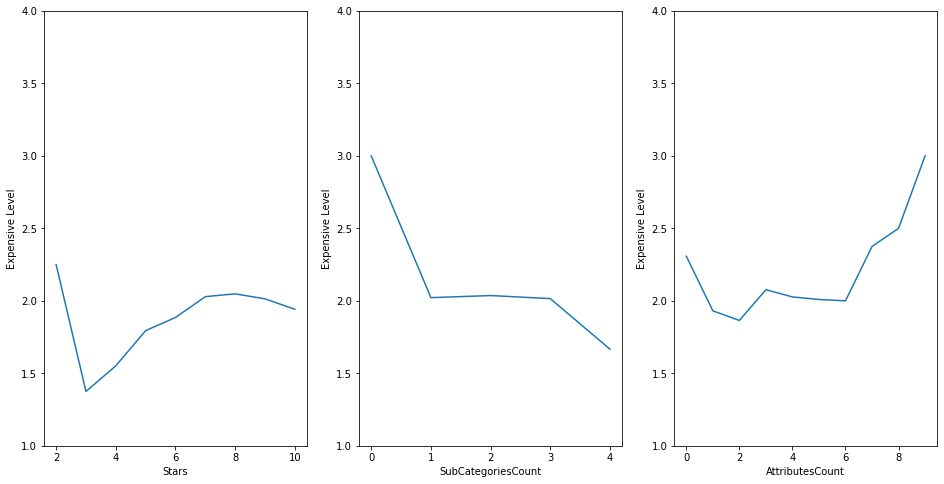

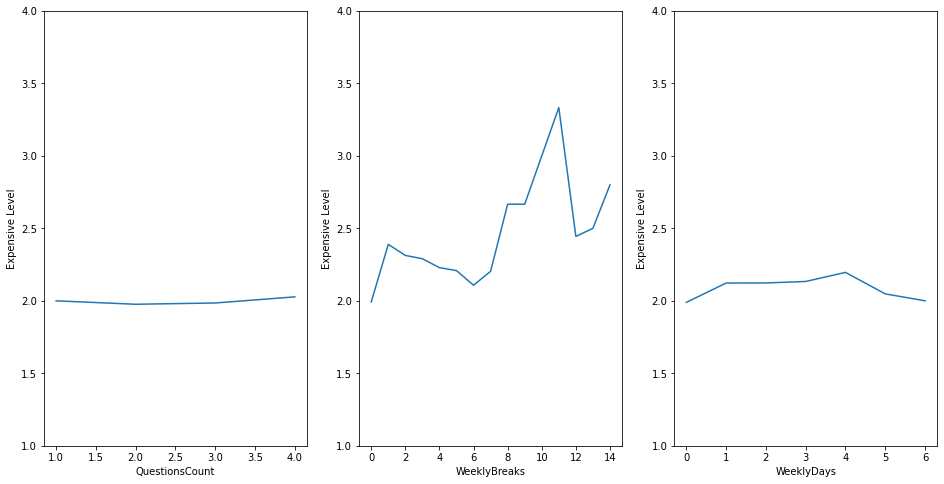

<Figure size 1152x576 with 0 Axes>

In [78]:
# Shows the average of "Has Expensive Level" for every column by value
# Average of "Has Expensive Level" symbolizes how likely it is to have expensive level

if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_countable_columns
    atter_name = 'mean'
    
    elements_in_line = 3
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                atter_df = df[[target_column, column]].groupby([column])
                atter_df = getattr(atter_df, atter_name)()
            
                indexs += [atter_df.index]
                values += [atter_df[target_column].values]            
        
        disply_atter_per_column(indexs, values, printed_columns[:elements_in_line], 1.0, 4.0)
        printed_columns = printed_columns[elements_in_line:]

<AxesSubplot:>

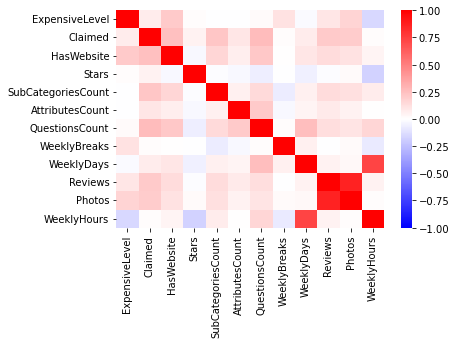

In [79]:
corr_matrix = df[[target_column] + prime_columns].corr()
sns.heatmap(
    corr_matrix,
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = plt.cm.get_cmap("bwr")
    )

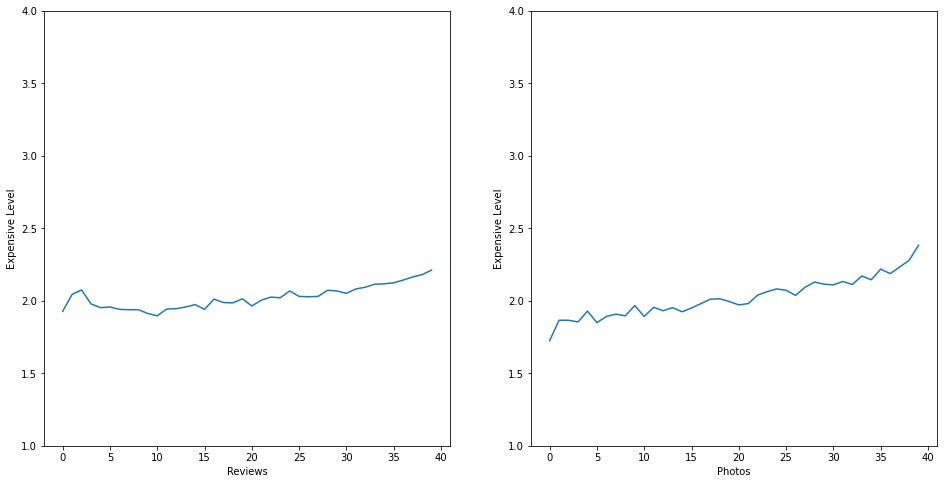

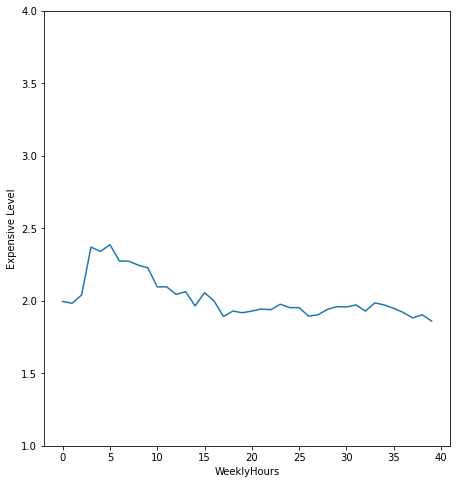

In [80]:
## calculates the probability based on sections

if SHOW_IN_DEVELOPMENT:
    
    sections=40
    atter_name = 'mean'
    elements_in_line = 2
    printed_columns = prime_non_countable_columns
    
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                new_df = df[[target_column, column]].sort_values(column)
                length = len(new_df)
                new_df["Sections"] = df.index//(length/sections)
                section_name = range(0,100,100//sections)
                atter_df = new_df[[target_column, "Sections"]].groupby(["Sections"])
                atter_df = getattr(atter_df, atter_name)()
            
                indexs += [atter_df.index]
                values += [atter_df[target_column].values]            
        
        disply_atter_per_column(indexs, values, printed_columns[:elements_in_line], 1.0, 4.0)
        printed_columns = printed_columns[elements_in_line:]


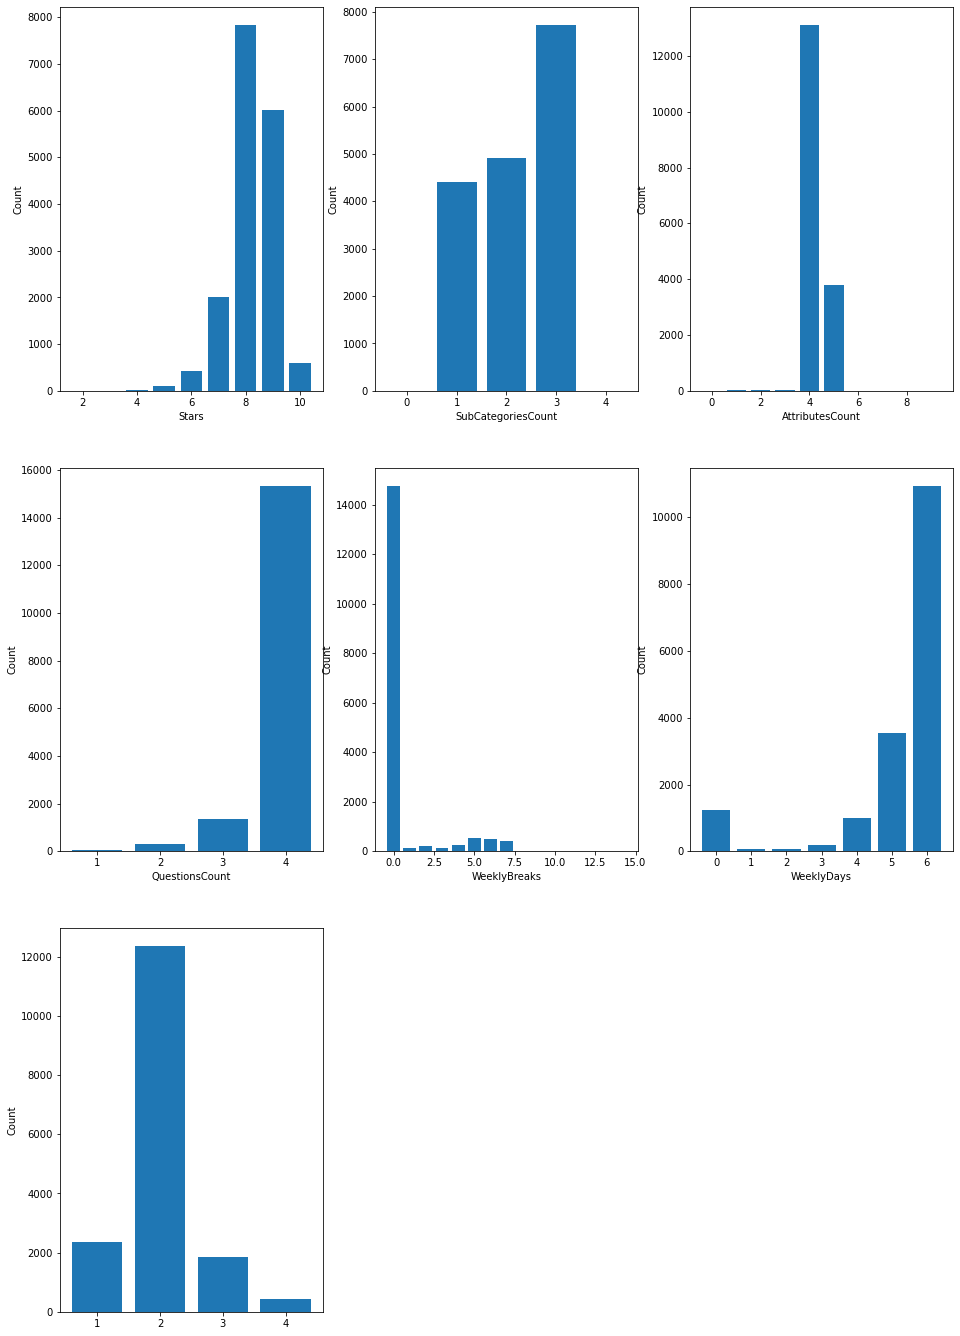

In [81]:
# Shows how much data we have for each value in each feature

if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_countable_columns + [target_column]
    elements_in_line = 3
    indexs = []
    values = []
    for column in printed_columns:
        if column is not None:
            count_df = df[column].value_counts()
            
            indexs += [count_df.index]
            values += [count_df.values.tolist()]            
    
    disply_multi_bars(indexs, values, printed_columns, 'Count', elements_in_line)
    

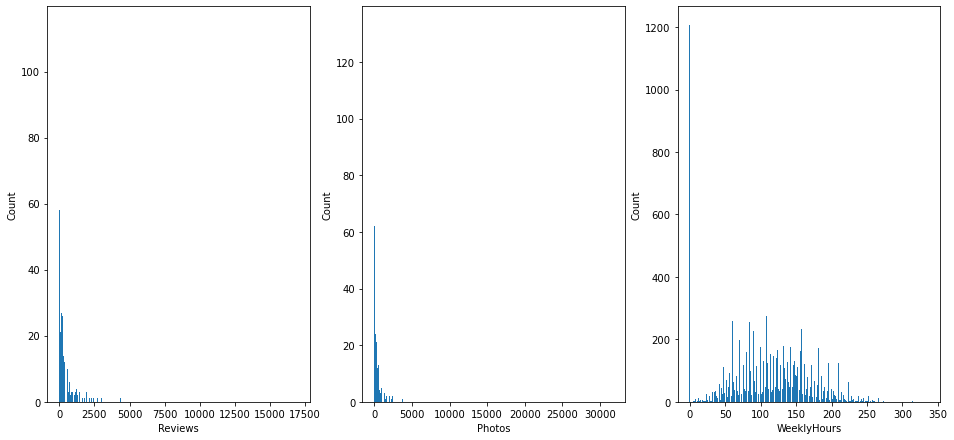

<Figure size 1152x1152 with 0 Axes>

In [82]:
if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_non_countable_columns    
    elements_in_line = 3
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                count_df = df[[target_column, column]].groupby([column]).count()
            
                indexs += [count_df.index]
                values += [count_df[target_column].values.tolist()]            

        disply_multi_bars(indexs, values, printed_columns[:elements_in_line], 'Count', elements_in_line)
        printed_columns = printed_columns[elements_in_line:]

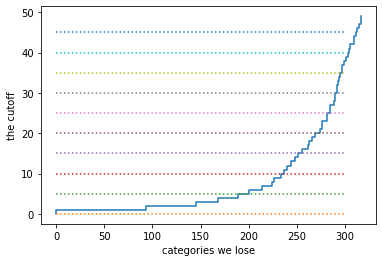

In [83]:
# Shows how much features we lose if we decide to limit the amount of instances a category should have to appear

if SHOW_IN_DEVELOPMENT:
    column_values = df.columns.map(lambda x: x.startswith("Cat_"))
    cat_df = df.loc[:, column_values]
    categ = cat_df.sum().sort_values()
    limits = range(50)
    remainders = []
    for limit in limits:
        remainders += [(categ.values<limit).sum()]
    fig= plt.figure()
    ax_graph= fig.add_subplot(1,1,1)
    ax_graph= plt.step(remainders,limits)
    for i in range(0,50,5):
        plt.plot([0,300],[i,i],linestyle= ":" )
    plt.ylabel("the cutoff")
    plt.xlabel("categories we lose")
    plt.show()

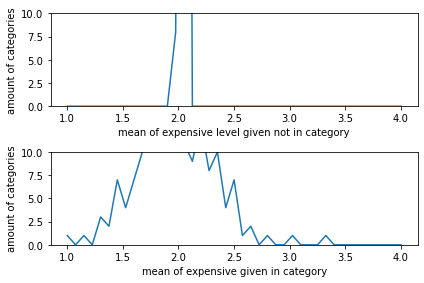

In [84]:
# Shows us how much categories we have for different means
# This is only for lior

if SHOW_IN_DEVELOPMENT:
    sections = 40
    step = 3/sections
    sub_categories = filter(lambda x: x.startswith("Cat_"),df.columns)
    x0 = np.arange(1.0,3.999 + step,step)
    y0 = np.zeros(sections + 1)
    x1 = np.arange(1.0,3.9999 + step ,step)
    y1 = np.zeros(sections + 1)
    
    for category in sub_categories:
        if (df[category].sum()>5):
            mean_df = df[[target_column, category]].groupby([category]).mean()
            standardised0 = ( mean_df.loc[0.0,target_column] - 1)/3.0 
            y0[(int)((standardised0 * sections).round())] += 1
            if (1.0 in mean_df.index):
                standardised1 = ( mean_df.loc[1.0,target_column] - 1)/3.0 
                y1[(int) ((standardised1 * sections).round())] += 1

                
                
    #handle layout
    fig = plt.figure()
    ax0_graph = fig.add_subplot(2,1,1)
    plt.plot(x0,y0)
    plt.xlabel("mean of expensive level given not in category")
    plt.ylabel("amount of categories")
    plt.ylim(0,10)
    ax1_graph = fig.add_subplot(2,1,2)
    ax1_graph = plt.plot(x1,y1)
    plt.xlabel("mean of expensive given in category")
    plt.ylabel("amount of categories")
    plt.ylim(0,10)
    plt.tight_layout()
    plt.show()
    #looks like not being in a category doesnt help predict

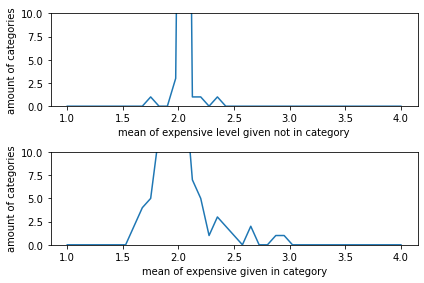

In [85]:
# Shows us how much categories we have for different means
# This is only for lior

if SHOW_IN_DEVELOPMENT:
    sections = 40
    step = 3/sections
    sub_categories = filter(lambda x: x.startswith("ExtraAt_"),df.columns)
    x0 = np.arange(1.0,3.999 + step,step)
    y0 = np.zeros(sections + 1)
    x1 = np.arange(1.0,3.9999 + step ,step)
    y1 = np.zeros(sections + 1)
    
    for category in sub_categories:
        if (df[category].sum()>5):
            mean_df = df[[target_column, category]].groupby([category]).mean()
            standardised0 = ( mean_df.loc[0.0,target_column] - 1)/3.0 
            y0[(int)((standardised0 * sections).round())] += 1
            if (1.0 in mean_df.index):
                standardised1 = ( mean_df.loc[1.0,target_column] - 1)/3.0 
                y1[(int) ((standardised1 * sections).round())] += 1
    
    
    #handle layout
    fig = plt.figure()
    ax0_graph = fig.add_subplot(2,1,1)
    plt.plot(x0,y0)
    plt.xlabel("mean of expensive level given not in category")
    plt.ylabel("amount of categories")
    plt.ylim(0,10)
    ax1_graph = fig.add_subplot(2,1,2)
    ax1_graph = plt.plot(x1,y1)
    plt.xlabel("mean of expensive given in category")
    plt.ylabel("amount of categories")
    plt.ylim(0,10)
    plt.tight_layout()
    plt.show()
    
    #looks like not being in a category doesnt help predict

In [86]:
## create collumns which generally represents a bunch of other collumns based on their relative mean
class create_general_collumns:
    
    def __init__(self, starter, collumns_number):
        self.collumn_map = np.empty(collumns_number+1, dtype= object)
        self.starter = starter
        self.starts = lambda x:x.startswith(starter)
        self.collumns_number = collumns_number
        
        
    def fit(self, df_create: pd.DataFrame):
        sub_categories = filter(self.starts, df_create.columns)
        
        for i in range(self.collumn_map.shape[0]):
            self.collumn_map[i] = []
        
        for category in sub_categories:
            mean_df = df[[target_column, category]].groupby([category]).mean()
            if (1.0 in mean_df.index):
                standardised = ( mean_df.loc[1.0,target_column] - 1)/3.0 
                self.collumn_map[(int) ((standardised1 * self.collumns_number).round())] += [category]
    
    
    def transform(self, df_create:pd.DataFrame):
        df_copy = df_create.copy()
        
        index=0
        for category_class in self.collumn_map:
            df_copy["general" + self.starter + str(index)] = df_copy[category_class].sum(axis=1)
            index += 1
        return df_copy

In [87]:
# Time enums

week_days = {
    "1": "Sunday",
    "2":"Monday",
    "3":"Tuesday",
    "4":"Wednesday",
    "5": "Thursday",
    "6":"Friday",
    "7":"Saturday"
}

time_open_select = [
    '12:00 AM', '12:30 AM',
    '1:00 AM', '1:30 AM',
    '2:00 AM', '2:30 AM',
    '3:00 AM', '3:30 AM',
    '4:00 AM', '4:30 AM',
    '5:00 AM', '5:30 AM',
    '6:00 AM', '6:30 AM',
    '7:00 AM', '7:30 AM',
    '8:00 AM', '8:30 AM',
    '9:00 AM', '9:30 AM',
    '10:00 AM', '10:30 AM',
    '11:00 AM', '11:30 AM',
    '12:00 PM', '12:30 PM',
    '1:00 PM', '1:30 PM',
    '2:00 PM', '2:30 PM',
    '3:00 PM', '3:30 PM',
    '4:00 PM', '4:30 PM',
    '5:00 PM', '5:30 PM',
    '6:00 PM', '6:30 PM',
    '7:00 PM', '7:30 PM',
    '8:00 PM', '8:30 PM',
    '9:00 PM', '9:30 PM',
    '10:00 PM', '10:30 PM',
    '11:00 PM', '11:30 PM',
    ]

time_end_select = [
    '12:00 AM', '12:30 AM',
    '1:00 AM', '1:30 AM',
    '2:00 AM', '2:30 AM',
    '3:00 AM', '3:30 AM',
    '4:00 AM', '4:30 AM',
    '5:00 AM', '5:30 AM',
    '6:00 AM', '6:30 AM',
    '7:00 AM', '7:30 AM',
    '8:00 AM', '8:30 AM',
    '9:00 AM', '9:30 AM',
    '10:00 AM', '10:30 AM',
    '11:00 AM', '11:30 AM',
    '12:00 PM', '12:30 PM',
    '1:00 PM', '1:30 PM',
    '2:00 PM', '2:30 PM',
    '3:00 PM', '3:30 PM',
    '4:00 PM', '4:30 PM',
    '5:00 PM', '5:30 PM',
    '6:00 PM', '6:30 PM',
    '7:00 PM', '7:30 PM',
    '8:00 PM', '8:30 PM',
    '9:00 PM', '9:30 PM',
    '10:00 PM', '10:30 PM',
    '11:00 PM', '11:30 PM',
    '12:00 AM ', '12:30 AM',
    '1:00 AM ', '1:30 AM ',
    '2:00 AM ', '2:30 AM ',
    '3:00 AM ', '3:30 AM ',
    '4:00 AM ', '4:30 AM ',
    '5:00 AM ', '5:30 AM ',
    '6:00 AM ', '6:30 AM ',
    ]


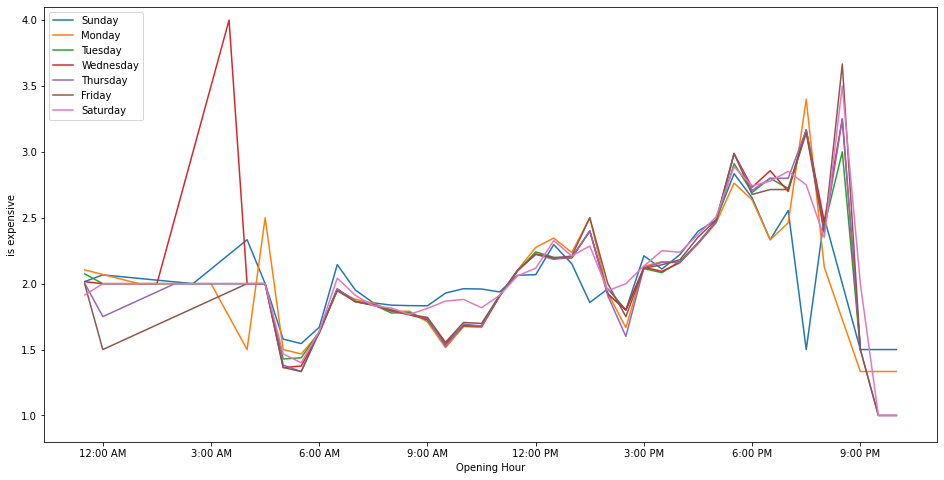

In [88]:
# Show the opening hour ped day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8))
    
    ax = fig.add_subplot(1, 1, 1)
    plt.sca(ax)
    
    plt.ylabel("is expensive")
    plt.xlabel("Opening Hour")
    
    for i in range(7):
        mean_df = df[["OpenHour"+str(i+1), target_column]].groupby(["OpenHour"+str(i+1)]).mean()
        plt.plot(mean_df.index, mean_df.values, label = week_days[str(i+1)])
    
    ax.set_xticks(range(0,48,6))
    ax.set_xticklabels(map(lambda x:time_open_select[int(x)], range(0,48,6)))
    
    plt.ylim(0.8, 4.1)
    plt.legend()
    
    plt.show()

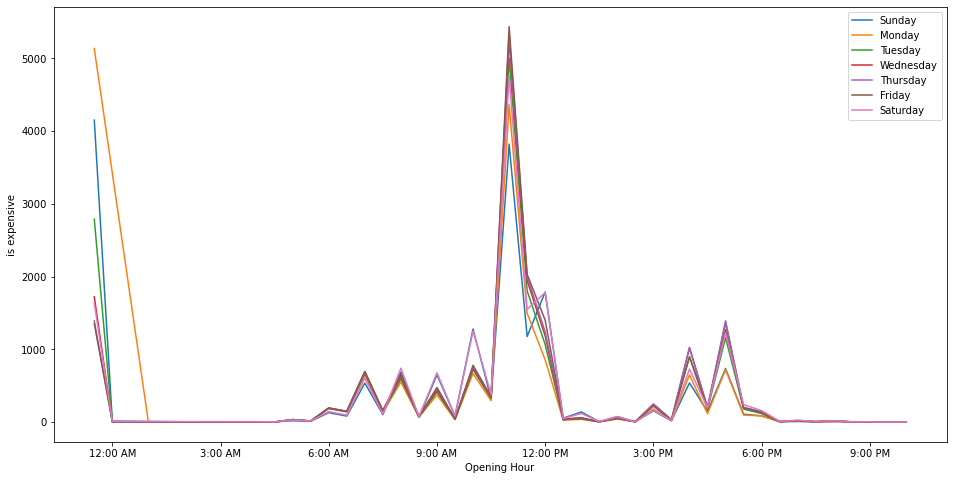

In [89]:
# Show the opening hour ped day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8))
    
    ax = fig.add_subplot(1, 1, 1)
    plt.sca(ax)
    
    plt.ylabel("is expensive")
    plt.xlabel("Opening Hour")
    
    for i in range(7):
        mean_df = df[["OpenHour"+str(i+1), target_column]].groupby(["OpenHour"+str(i+1)]).count()
        plt.plot(mean_df.index, mean_df.values, label = week_days[str(i+1)])
    
    ax.set_xticks(range(0,48,6))
    ax.set_xticklabels(map(lambda x:time_open_select[int(x)], range(0,48,6)))
    
    plt.legend()
    
    plt.show()

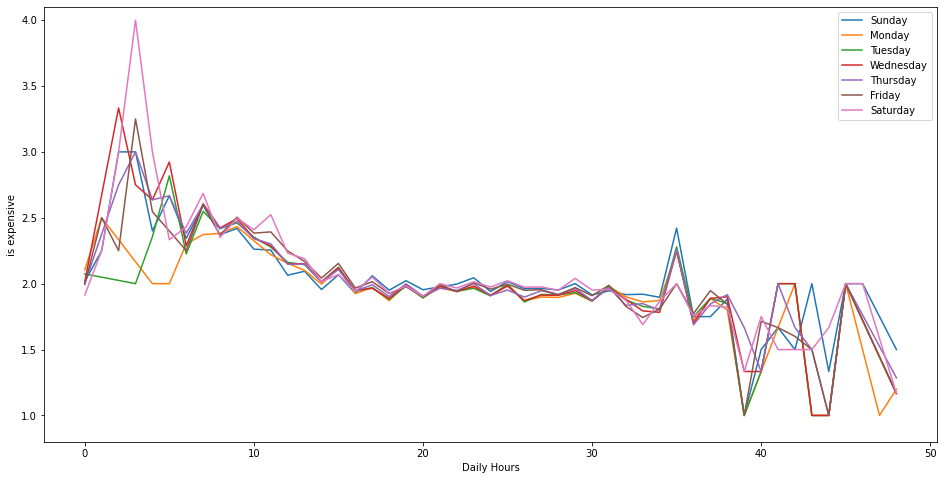

In [90]:
# Show the Daily Hours per day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8))
    
    ax = fig.add_subplot(1, 1, 1)
    plt.sca(ax)
    
    plt.ylabel("is expensive")
    plt.xlabel("Daily Hours")
    
    for i in range(7):
        mean_df = df[["CountHour"+str(i+1),target_column]].groupby(["CountHour"+str(i+1)]).mean()
        plt.plot(mean_df.index,mean_df.values,label = week_days[str(i+1)])

    plt.ylim(0.8,4.1)
    plt.legend()
    
    plt.show()

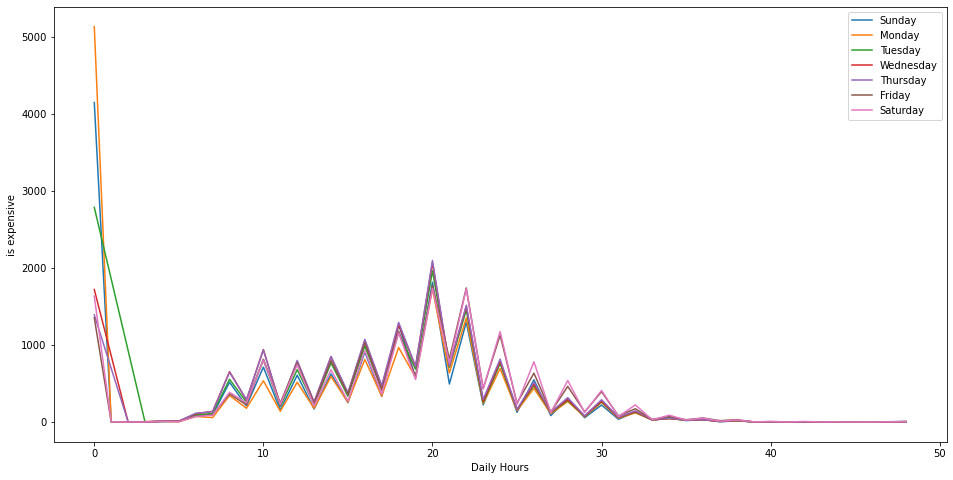

In [91]:
# Show the Daily Hours per day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8))
    
    ax = fig.add_subplot(1, 1, 1)
    plt.sca(ax)
    
    plt.ylabel("is expensive")
    plt.xlabel("Daily Hours")
    
    for i in range(7):
        mean_df = df[["CountHour"+str(i+1),target_column]].groupby(["CountHour"+str(i+1)]).count()
        plt.plot(mean_df.index,mean_df.values,label = week_days[str(i+1)])

    plt.legend()
    
    plt.show()

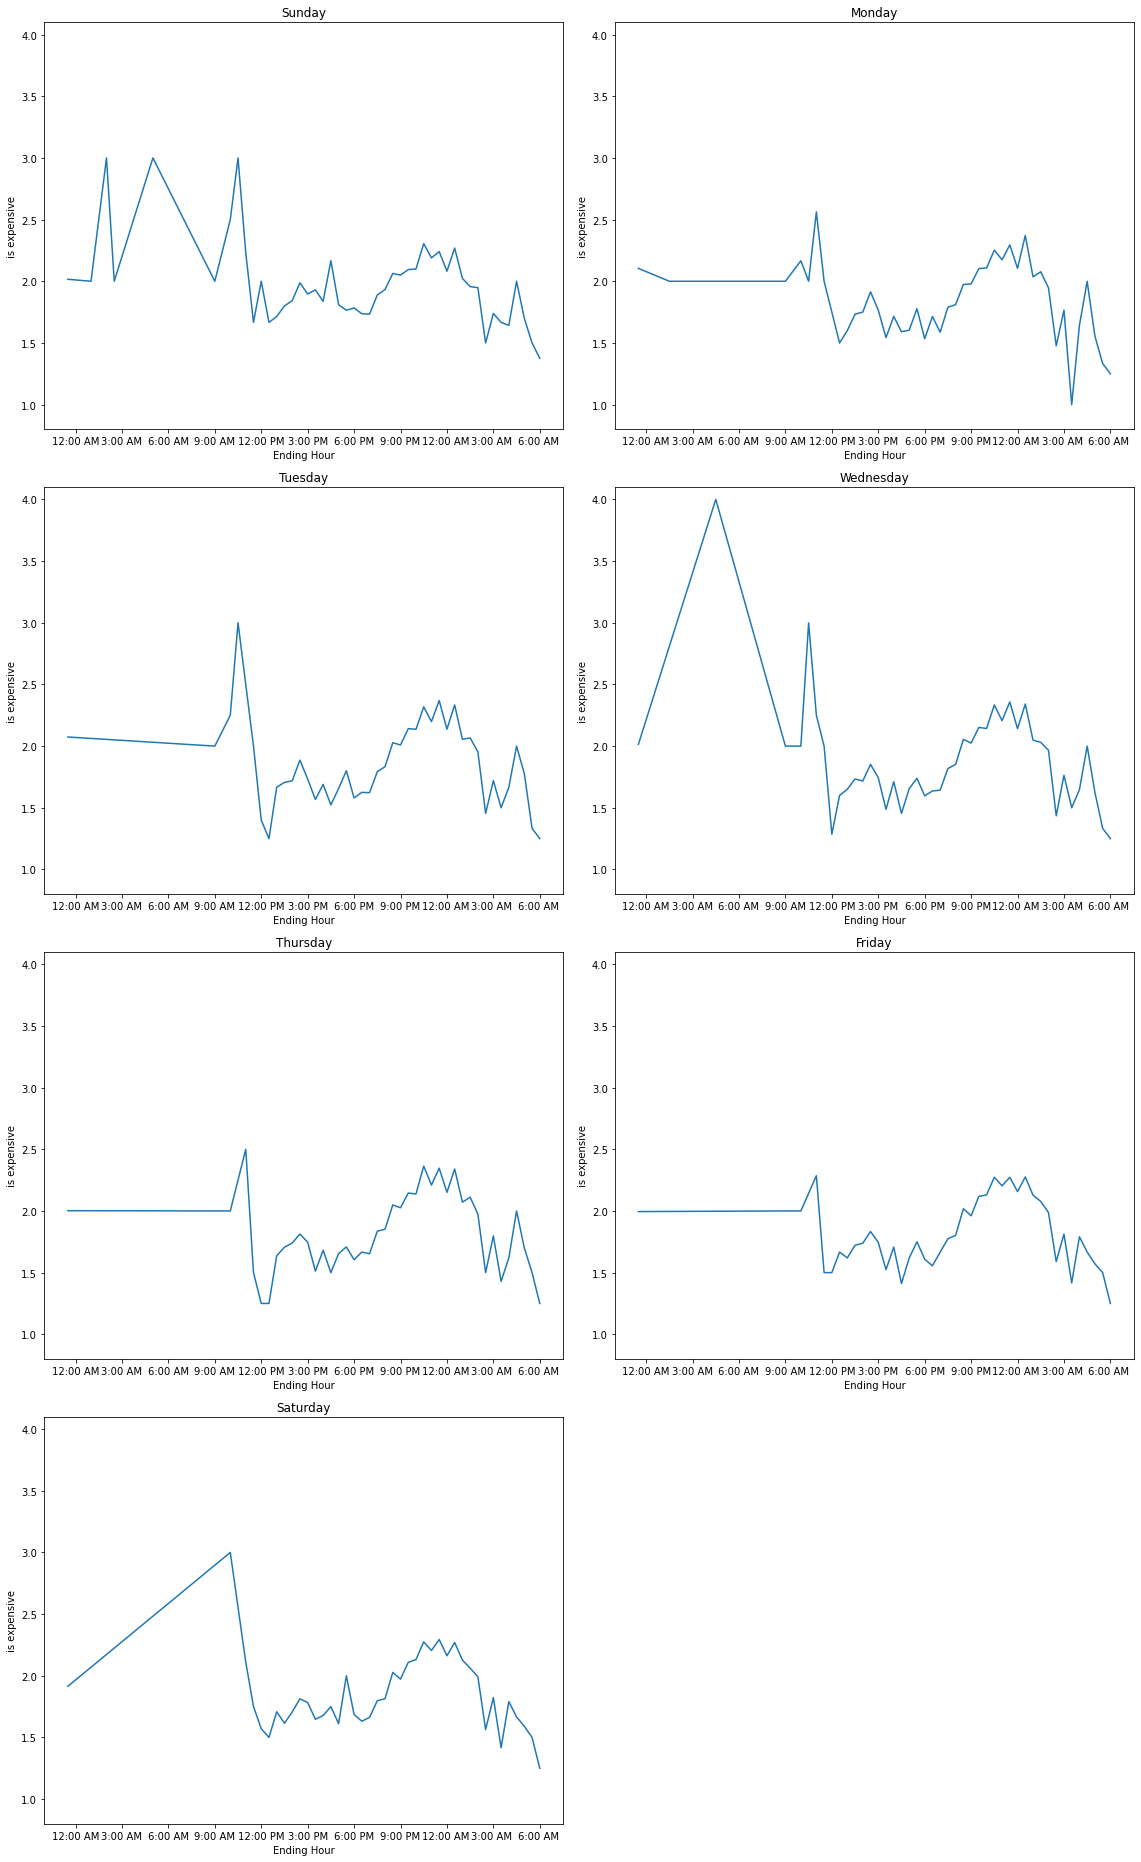

In [92]:
# Show the ending hour ped day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8 * 4))
    
    for i in range(7):
        ax_end=fig.add_subplot(5, 2, 1+i)
        plt.sca(ax_end)
        plt.ylabel("is expensive")
        plt.xlabel("Ending Hour")
        ax_end.set_title(week_days[str(i+1)])
        mean_df = df[["EndHour"+str(i+1),target_column]].groupby(["EndHour"+str(i+1)]).mean()
        plt.plot(mean_df.index,mean_df.values)
        ax_end.set_xticks(range(0,61,6))
        ax_end.set_xticklabels(map(lambda x:time_end_select[int(x)], range(0,61,6)))
                    
        plt.ylim(0.8, 4.1)
    
    
    plt.tight_layout()
    plt.show()

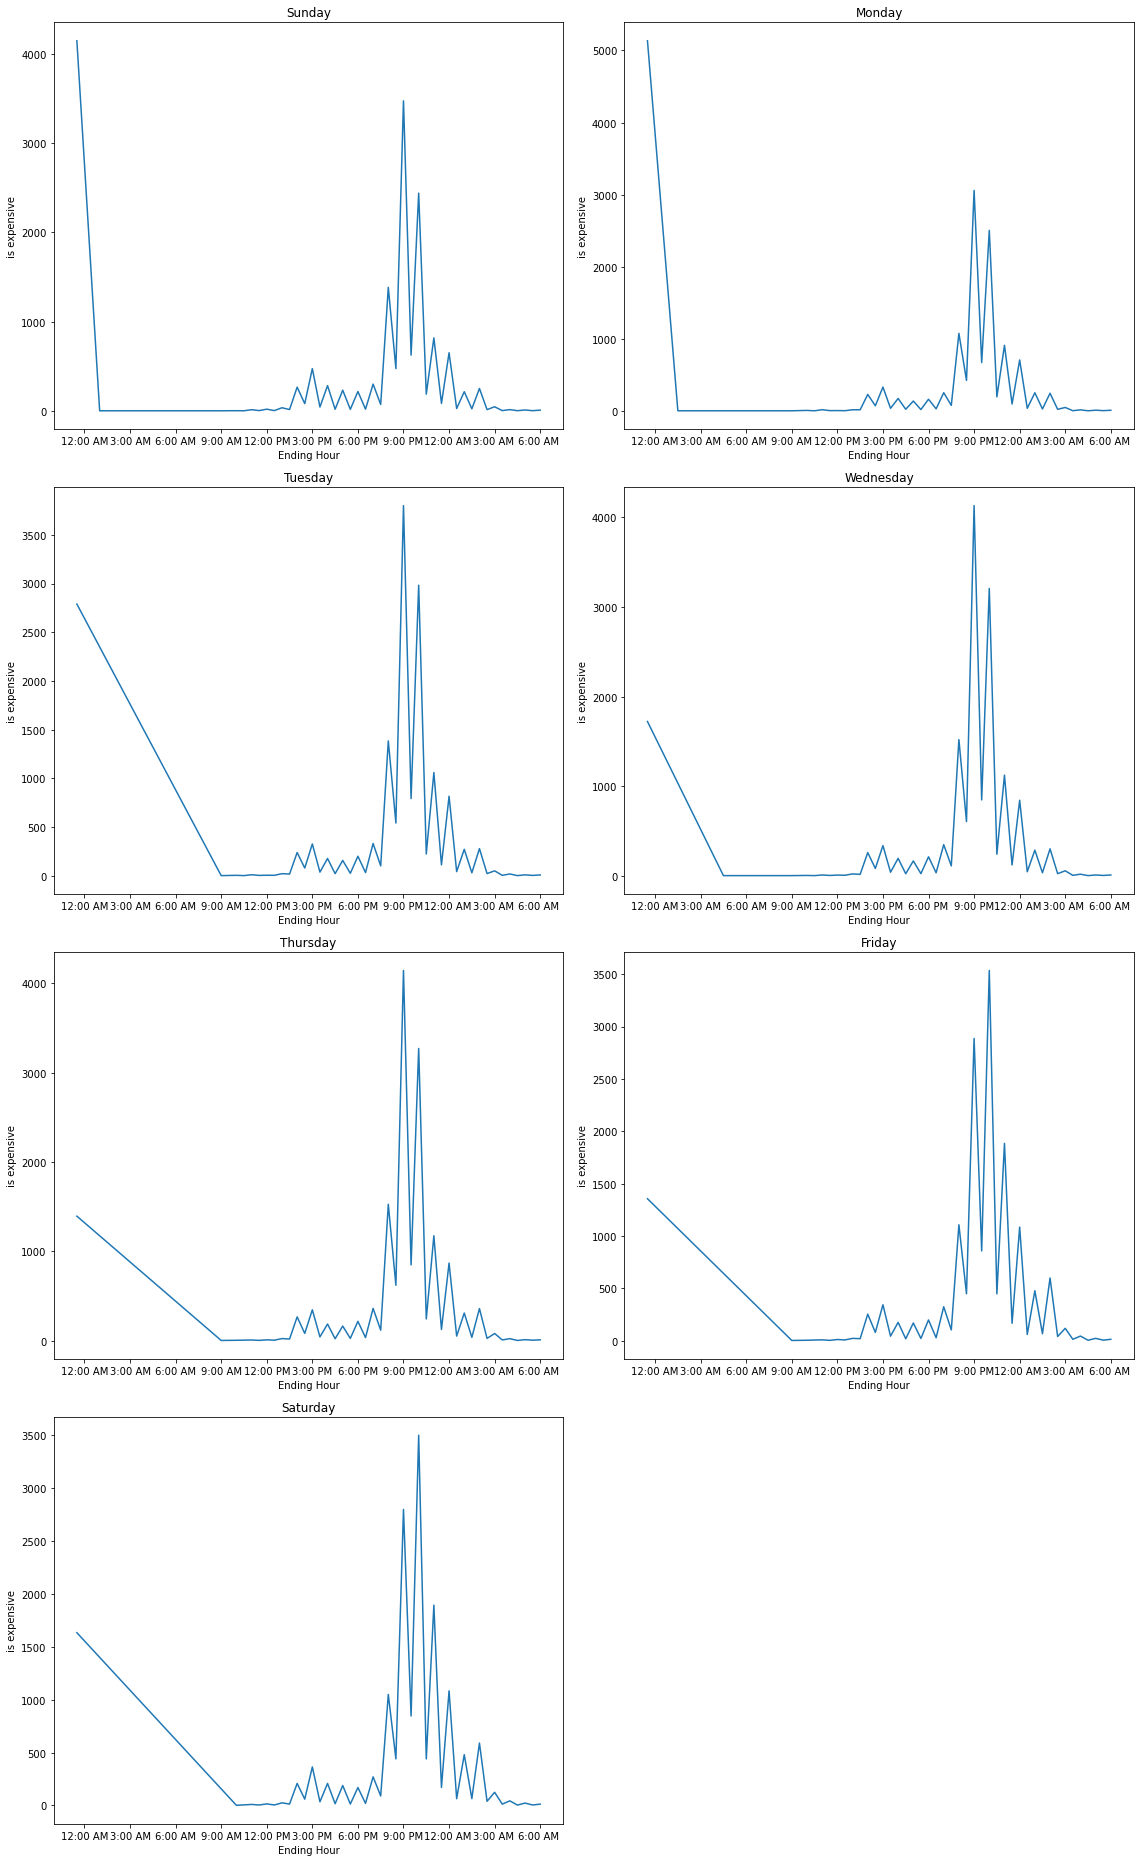

In [93]:
# Show the ending hour ped day

if SHOW_IN_DEVELOPMENT:    
    fig = plt.figure(figsize= (16, 8 * 4))
    
    for i in range(7):
        ax_end=fig.add_subplot(5, 2, 1+i)
        plt.sca(ax_end)
        plt.ylabel("is expensive")
        plt.xlabel("Ending Hour")
        ax_end.set_title(week_days[str(i+1)])
        mean_df = df[["EndHour"+str(i+1),target_column]].groupby(["EndHour"+str(i+1)]).count()
        plt.plot(mean_df.index,mean_df.values)
        ax_end.set_xticks(range(0,61,6))
        ax_end.set_xticklabels(map(lambda x:time_end_select[int(x)], range(0,61,6)))
                    
    
    
    plt.tight_layout()
    plt.show()

In [125]:
#model making

In [126]:
# Split the tain data,

x_sub_train, x_sub_test, y_sub_train, y_sub_test = train_test_split(x_train, y_train, random_state=53)

In [146]:
dummy_model = DummyRegressor(strategy="mean")

dummy_model.fit(x_sub_train, y_sub_train)

score = explained_variance_score( y_sub_test,dummy_model.predict(x_sub_test))
print("Dummy Model Score: ", score)

Dummy Model Score:  0.0


In [148]:
kNeighbors = KNeighborsRegressor()
kNeighbors.fit(x_sub_train, y_sub_train)

score = explained_variance_score( y_sub_test,kNeighbors.predict(x_sub_test))
print("knn Score: ", score)

knn Score:  0.10868677218701372
